In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
# Read the dataset
df = pd.read_excel('Telco_customer_churn.xlsx')

In [3]:
# Check the first few rows
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
# Get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Handling Missing Values

In [32]:
# Convert 'Total Charges' column to numeric, handling errors by coercing to NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Handling missing values in 'Total Charges' by filling with the product of 'Monthly Charges' and 'Tenure Months'
df['Total Charges'].fillna(df['Monthly Charges'] * df['Tenure Months'], inplace=True)


Data Analysis

In [35]:
# Calculate percentage of missing data per column
data_na = (df.isnull().sum() / len(df))
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'mean of nulls': data_na, "number of nulls": df[data_na.index].isna().sum()})

# Get the count of columns based on data types
float_count = len(df.select_dtypes('float').columns)
int_count = len(df.select_dtypes('int').columns)
object_count = len(df.select_dtypes('object').columns)

# Get the number of unique values per column
unique_values = df.nunique()


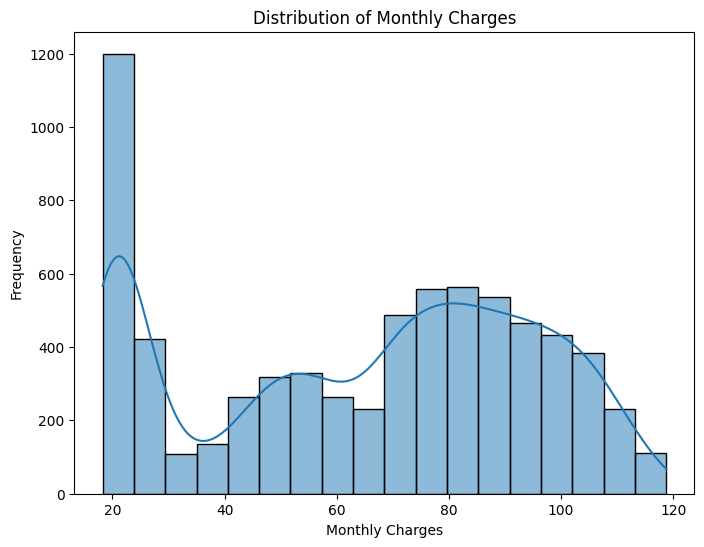

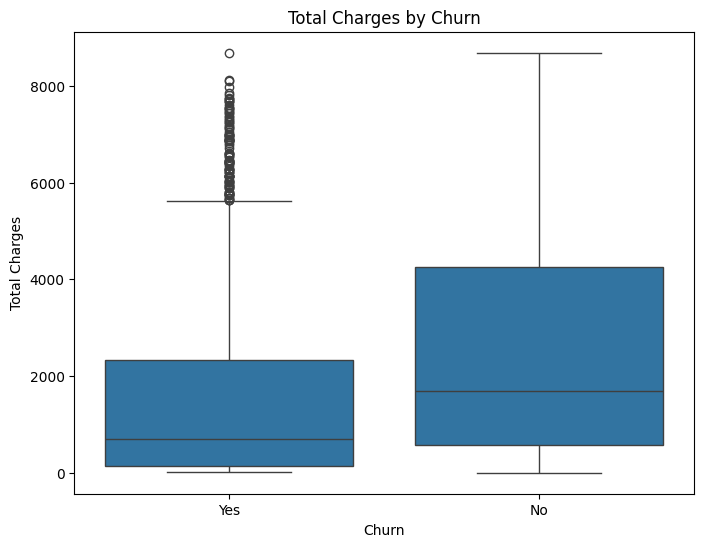

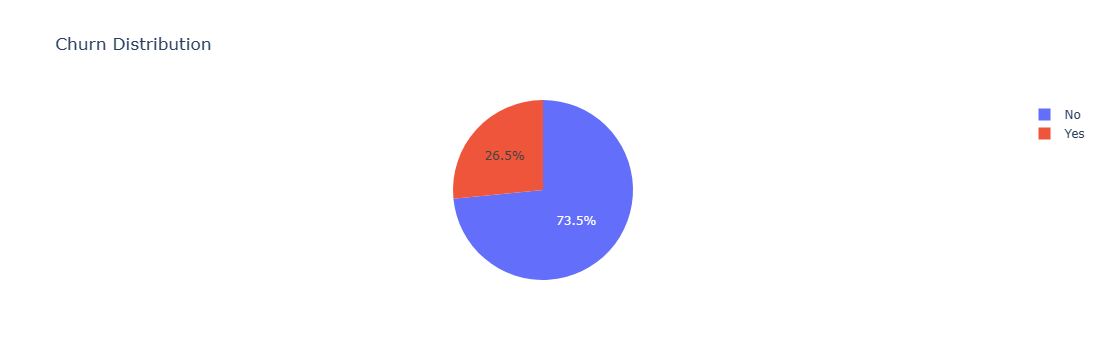

In [47]:
# Distribution of 'Monthly Charges'
plt.figure(figsize=(8, 6))
sns.histplot(df['Monthly Charges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# Boxplot of 'Total Charges' based on 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn Label', y='Total Charges', data=df)
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

# Example with Plotly Express - Pie chart of 'Churn' distribution
churn_counts = df['Churn Label'].value_counts().reset_index()
churn_counts.columns = ['Churn Label', 'Count']
fig = px.pie(churn_counts, values='Count', names='Churn Label', title='Churn Distribution')
fig.show()


In [6]:
# Get the count of columns based on data types
float_count = len(df.select_dtypes('float').columns)
int_count = len(df.select_dtypes('int').columns)
object_count = len(df.select_dtypes('object').columns)
print(f"""Number of:
float features: {float_count}
int features: {int_count}
object features: {object_count}
""")

Number of:
float features: 4
int features: 6
object features: 23



In [7]:
# Calculate percentage of missing data per column
data_na = (df.isnull().sum() / len(df)) 
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'mean of nulls': data_na, "number of nulls": df[data_na.index].isna().sum()})
missing_data

,mean of nulls,number of nulls
Churn Reason,0.734630,5174
Total Charges,0.001562,11


In [9]:
# Get the number of unique values per column
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

Percentage of missing data per column:
Churn Reason    73.463013
dtype: float64
Summary statistics for numerical columns:
        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Total Charges  Churn Value  Churn Score         CLTV  
count      7043.000000    7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692    2279.734304     0.265370    58.699418  4400.2

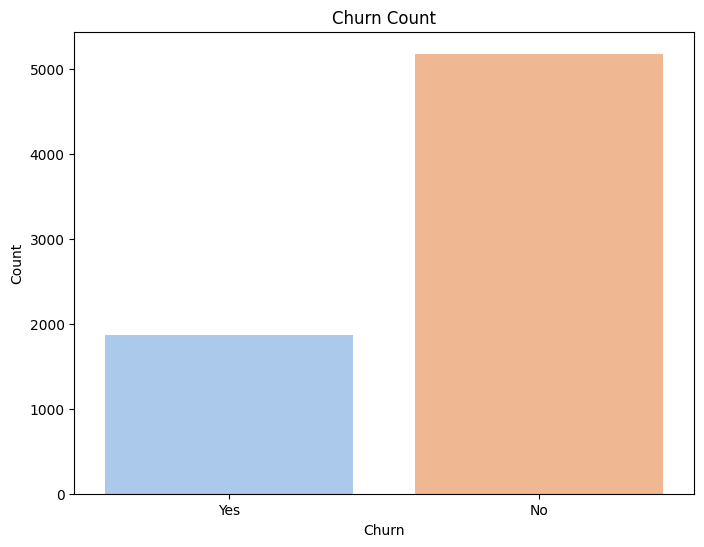

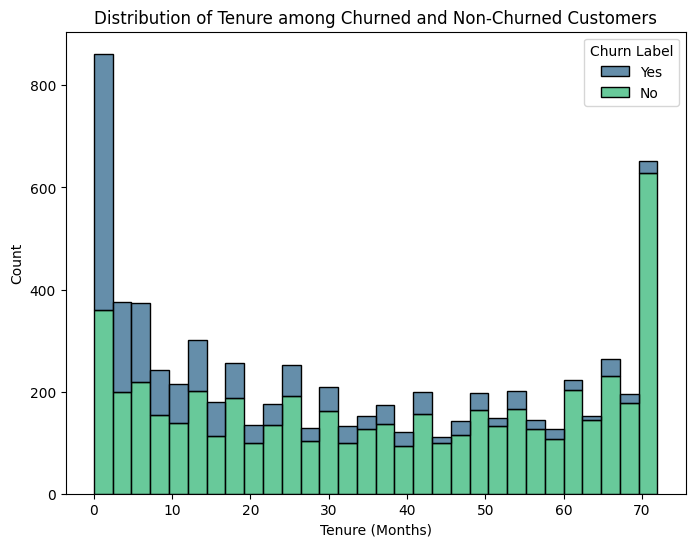

In [48]:
# Calculate percentage of missing data per column
missing_data_percentage = df.isnull().mean() * 100
missing_data_columns = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)
print("Percentage of missing data per column:")
print(missing_data_columns)

# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df.describe())

# Visualizing churn count
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn Label',hue='Churn Label', legend=False, palette='pastel')
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Visualizing distribution of tenure among churned and non-churned customers
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Tenure Months', hue='Churn Label', multiple='stack', palette='viridis', bins=30)
plt.title('Distribution of Tenure among Churned and Non-Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()


Analyzing 'Churn Label' Distribution

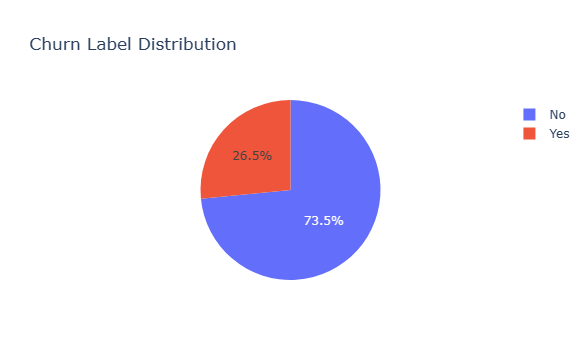

In [38]:
churn_label_counts = df['Churn Label'].value_counts()
fig_churn_label = px.pie(names=churn_label_counts.keys(), values=churn_label_counts.values, title='Churn Label Distribution')
fig_churn_label.show()


Analyzing 'Churn Reason' Distribution Using a Bar Chart

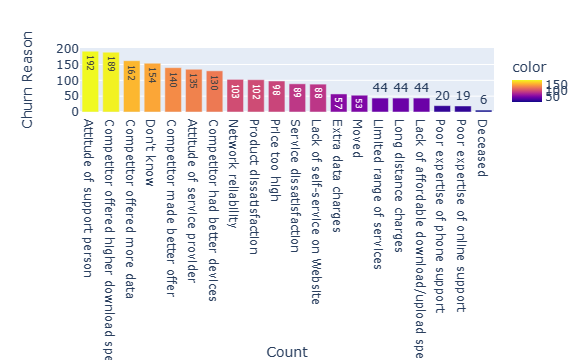

In [11]:
# Analyzing 'Churn Reason' distribution using a bar chart
churn_reason_values = df['Churn Reason'].value_counts(ascending=False).values
churn_reason_keys = df['Churn Reason'].value_counts(ascending=False).keys()
fig_churn_reason = px.bar(x=churn_reason_keys, y=churn_reason_values, color=churn_reason_values, text=churn_reason_values)
fig_churn_reason.update_layout(
    yaxis_title="Churn Reason",
    xaxis_title="Count"
)
fig_churn_reason.show()

Grouping Data by 'City' and 'Churn Label', Calculating Churn Rate

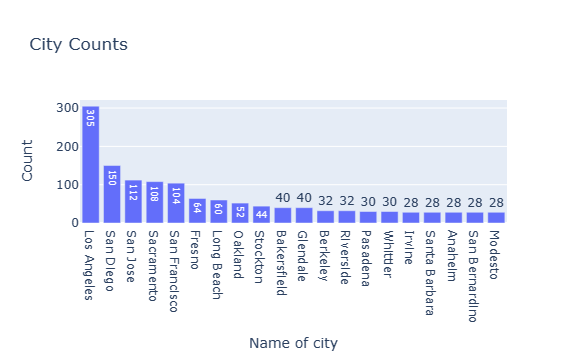

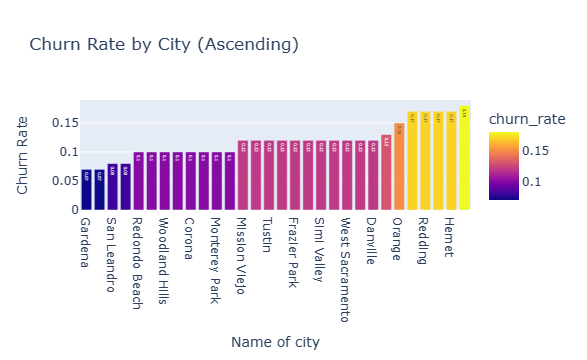

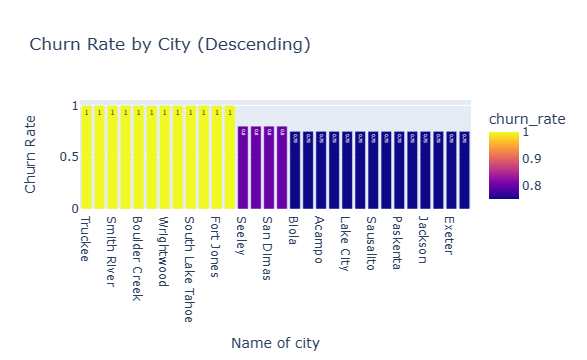

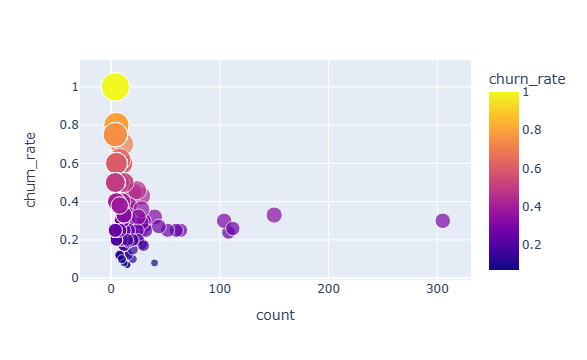

In [12]:
# Group by 'City' and 'Churn Label' and count the occurrences
grouped = df.groupby(['City', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('City').transform('sum')
churn_rate = round(grouped / total_counts, 2)
City_ChurnLabel = pd.DataFrame({'churn_rate': churn_rate}).reset_index()

# Create a DataFrame with the total count per city
city_counts = df.groupby('City')['CustomerID'].count().reset_index()
city_counts.rename(columns={'CustomerID': 'count'}, inplace=True)

# Merge the City_ChurnLabel and city_counts DataFrames
City_ChurnLabel = City_ChurnLabel.merge(city_counts, on='City')

# Filter out the rows where 'Churn Label' is 'Yes'
City_ChurnLabel = City_ChurnLabel[City_ChurnLabel['Churn Label'] == 'Yes']

# Sort dataframe by count and churn rate
City_ChurnLabel_count_sorted = City_ChurnLabel.sort_values(by='count', ascending=False)
City_ChurnLabel_churn_rate_asc = City_ChurnLabel.sort_values(by='churn_rate', ascending=True).head(30)
City_ChurnLabel_churn_rate_desc = City_ChurnLabel.sort_values(by='churn_rate', ascending=False).head(30)

# Create a bar plot showing the count of churn by city
fig_count = px.bar(
    City_ChurnLabel_count_sorted.head(20),
    x='City',
    y='count',
    title='City Counts',
    text='count'
)
fig_count.update_layout(
    xaxis_title="Name of city",
    yaxis_title="Count"
)

# Create bar plots for churn rates by city (ascending and descending)
fig_churn_rate_asc = px.bar(
    City_ChurnLabel_churn_rate_asc,
    x='City',
    y='churn_rate',
    title='Churn Rate by City (Ascending)',
    text='churn_rate',
    color='churn_rate'
)
fig_churn_rate_asc.update_layout(
    xaxis_title="Name of city",
    yaxis_title="Churn Rate"
)

fig_churn_rate_desc = px.bar(
    City_ChurnLabel_churn_rate_desc,
    x='City',
    y='churn_rate',
    title='Churn Rate by City (Descending)',
    text='churn_rate',
    color='churn_rate'
)
fig_churn_rate_desc.update_layout(
    xaxis_title="Name of city",
    yaxis_title="Churn Rate"
)

# Create a scatter plot showing churn rate vs count
fig_scatter = px.scatter(
    City_ChurnLabel,
    x="count",
    y="churn_rate",
    size='churn_rate',
    labels='City',
    color='churn_rate'
)

# Show the plots
fig_count.show()
fig_churn_rate_asc.show()
fig_churn_rate_desc.show()
fig_scatter.show()


In [13]:
City_ChurnLabel_count_sorted.drop(columns='Churn Label', inplace=True)
City_ChurnLabel_count_sorted.head()

,City,churn_rate,count
976,Los Angeles,0.30,305
1502,San Diego,0.33,150
1518,San Jose,0.26,112
1479,Sacramento,0.24,108
1508,San Francisco,0.30,104


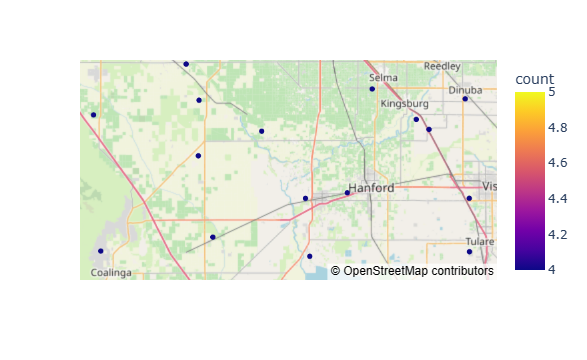

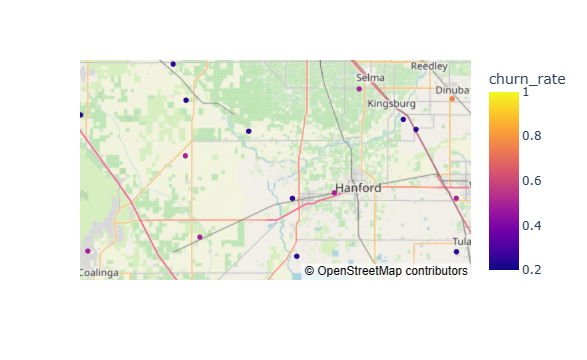

In [14]:
# Group by 'Latitude', 'Longitude', and 'Churn Label' and count the occurrences
grouped = df.groupby(['Latitude', 'Longitude', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby(['Latitude', 'Longitude']).transform('sum')
churn_rate = round(grouped / total_counts, 2)
loc_ChurnLabel = pd.DataFrame({'churn_rate': churn_rate}).reset_index()

# Create a DataFrame with the total count per location
loc_counts = df.groupby(['Latitude', 'Longitude'])['CustomerID'].count().reset_index()
loc_counts.rename(columns={'CustomerID': 'count'}, inplace=True)

# Merge the loc_ChurnLabel and loc_counts DataFrames
loc_ChurnLabel = loc_ChurnLabel.merge(loc_counts, on=['Latitude', 'Longitude'])

# Filter out the rows where 'Churn Label' is 'Yes' and sort DataFrame by count
loc_ChurnLabel = loc_ChurnLabel[loc_ChurnLabel['Churn Label'] == 'Yes']
loc_ChurnLabel = loc_ChurnLabel.sort_values(by='count', ascending=False)
loc_ChurnLabel.drop(columns='Churn Label', inplace=True)

loc_ChurnLabel.head()

# Scatter Mapbox Visualizations
fig_map_count = px.scatter_mapbox(loc_ChurnLabel,
                                  lat="Latitude", lon='Longitude',
                                  hover_data=['count'], mapbox_style='open-street-map',
                                  color="count")
fig_map_count.show()

fig_map_churn_rate = px.scatter_mapbox(loc_ChurnLabel,
                                       lat="Latitude", lon='Longitude',
                                       hover_data=['churn_rate'], mapbox_style='open-street-map',
                                       color="churn_rate")
fig_map_churn_rate.show()


In [15]:
loc_ChurnLabel.head()

,Latitude,Longitude,churn_rate,count
1,32.555828,-117.040073,0.2,5
672,34.038983,-117.991372,0.6,5
698,34.050198,-118.210946,0.2,5
696,34.049841,-118.338460,0.2,5
690,34.048013,-118.293953,0.2,5


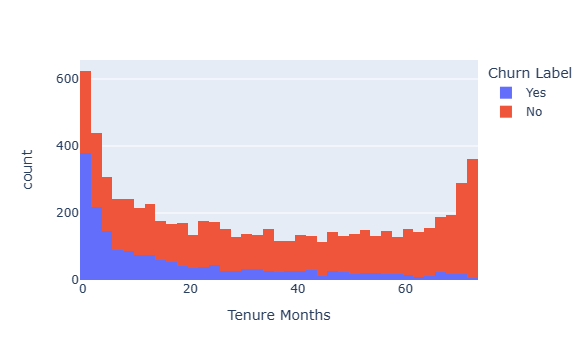

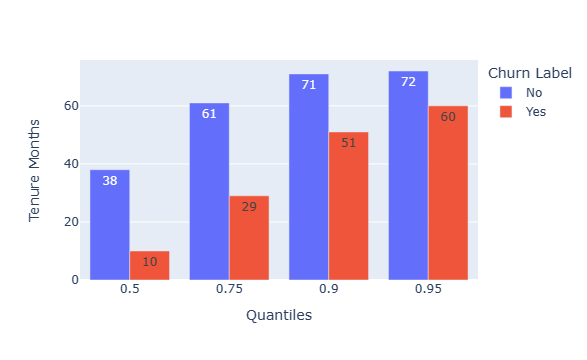

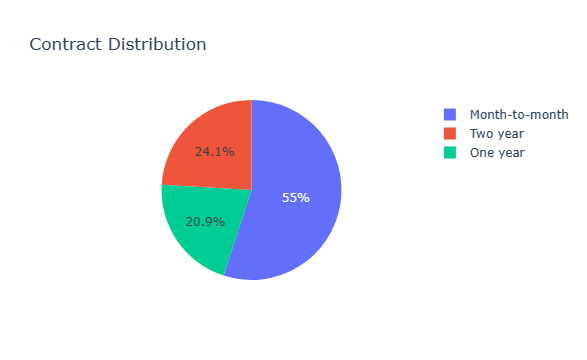

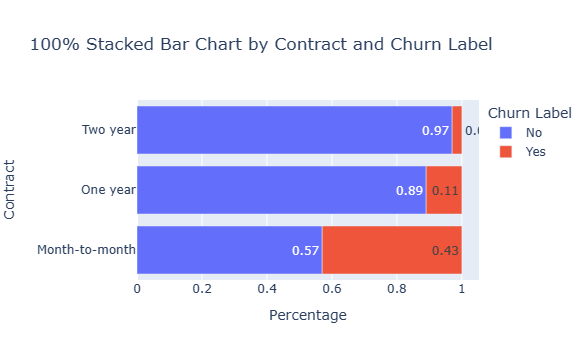

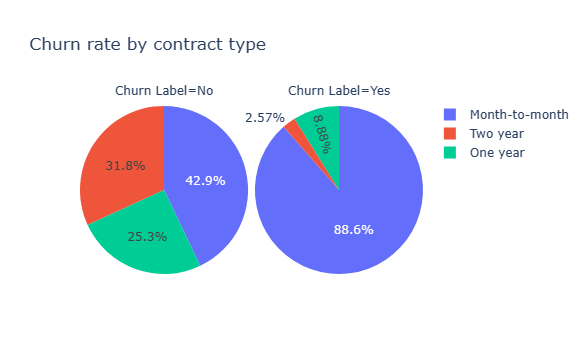

In [16]:
# Histogram showing Tenure Months with Churn Label differentiation
fig_histogram = px.histogram(df, x="Tenure Months", color="Churn Label")
fig_histogram.show()

# Calculating quantiles for Tenure Months by Churn Label
TenureMonths = df.groupby('Churn Label')['Tenure Months'].quantile([.50, .75, .90, .95]).reset_index()
TenureMonths['level_1'] = TenureMonths['level_1'].astype(str)

# Bar chart displaying Tenure Months quantiles by Churn Label
fig_tenure = px.bar(TenureMonths, x='level_1', y='Tenure Months',
                     color='Churn Label', barmode="group", text='Tenure Months')

fig_tenure.update_xaxes(title="Quantiles")
fig_tenure.show()

# Pie chart displaying Contract distribution
Contract_Label_counts = df['Contract'].value_counts()
fig_contract_pie = px.pie(names=Contract_Label_counts.keys(), values=Contract_Label_counts.values, title='Contract Distribution')
fig_contract_pie.show()

# Group by 'Contract' and 'Churn Label' and calculate occurrences
grouped = df.groupby(['Contract', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Contract').transform('sum')
normalized_count = round(grouped / total_counts, 2)
Contract_ChurnLabel = pd.DataFrame({'normalized_count': normalized_count}).reset_index()

# Stacked bar chart showing Contract and Churn Label relationship
fig_contract_bar = px.bar(Contract_ChurnLabel, x='normalized_count', y='Contract', color='Churn Label',
                          title='100% Stacked Bar Chart by Contract and Churn Label', text='normalized_count',
                          labels={'normalized_count': 'Percentage'})

fig_contract_bar.update_layout(barmode='relative')  # Make the bar chart 100% stacked
fig_contract_bar.show()

# Pie chart displaying Churn rate by contract type
fig_churn_rate_contract = px.pie(df.groupby(['Contract', 'Churn Label'])['CustomerID'].count().reset_index(),
                                 values='CustomerID', names='Contract',
                                 facet_col='Churn Label', title='Churn rate by contract type')

fig_churn_rate_contract.show()


In [17]:
Contract_ChurnLabel

,Contract,Churn Label,normalized_count
0,Month-to-month,No,0.57
1,Month-to-month,Yes,0.43
2,One year,No,0.89
3,One year,Yes,0.11
4,Two year,No,0.97
5,Two year,Yes,0.03


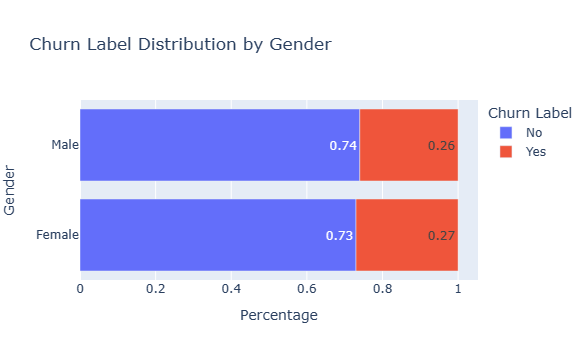

In [18]:
# Calculate the normalized value counts for Gender
gender_counts = df['Gender'].value_counts(normalize=True)

# Group by 'Gender' and 'Churn Label' and count the occurrences
grouped = df.groupby(['Gender', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Gender').transform('sum')
normalized_count = round(grouped / total_counts, 2)
Gender_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

# Create a bar chart displaying the Churn Label distribution by Gender
fig_gender_bar = px.bar(Gender_ChurnLabel, x='rate', y='Gender', color='Churn Label',
                        title='Churn Label Distribution by Gender', text='rate',
                        labels={'rate': 'Percentage'})

fig_gender_bar.update_layout(barmode='relative')  # Make the bar chart 100% stacked
fig_gender_bar.show()


In [19]:
Gender_ChurnLabel

,Gender,Churn Label,rate
0,Female,No,0.73
1,Female,Yes,0.27
2,Male,No,0.74
3,Male,Yes,0.26


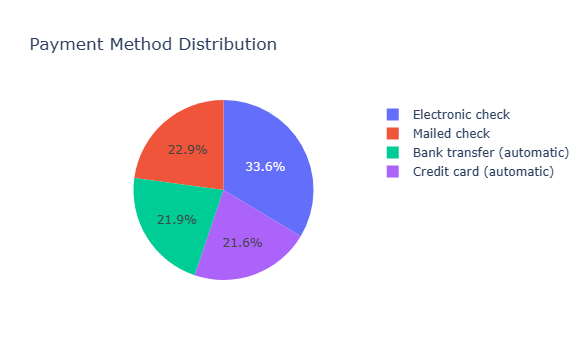

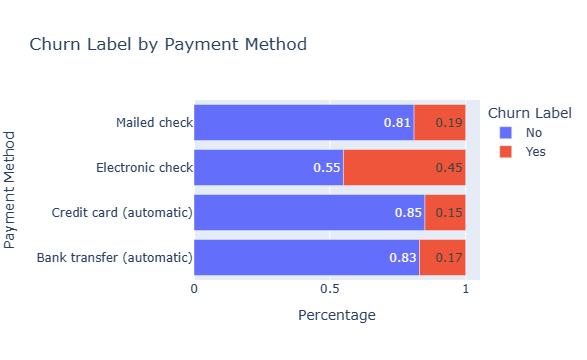

In [20]:
# Calculate the value counts for Payment Method
payment_method_counts = df['Payment Method'].value_counts()

# Create a pie chart to visualize the Payment Method distribution
fig_payment_pie = px.pie(names=payment_method_counts.index, values=payment_method_counts.values, title='Payment Method Distribution')
fig_payment_pie.show()

# Group by 'Payment Method' and 'Churn Label', then calculate the normalized occurrences
grouped = df.groupby(['Payment Method', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Payment Method').transform('sum')
normalized_count = round(grouped / total_counts, 2)
Payment_Method_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

# Create a 100% stacked bar chart for Payment Method and Churn Label
fig_payment_bar = px.bar(Payment_Method_ChurnLabel, x='rate', y='Payment Method', color='Churn Label',
                         title='Churn Label by Payment Method', text='rate', labels={'rate': 'Percentage'})
fig_payment_bar.update_layout(barmode='relative')  # Make the bar chart 100% stacked
fig_payment_bar.show()


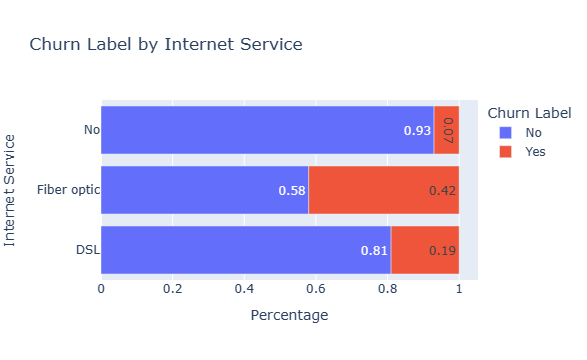

In [21]:
# Calculate the value counts for Internet Service
internet_service_counts = df['Internet Service'].value_counts()

# Group by 'Internet Service' and 'Churn Label', then calculate the normalized occurrences
grouped = df.groupby(['Internet Service', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Internet Service').transform('sum')
normalized_count = round(grouped / total_counts, 2)
Internet_Service_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

# Create a 100% stacked bar chart for Internet Service and Churn Label
fig_internet_bar = px.bar(Internet_Service_ChurnLabel, x='rate', y='Internet Service', color='Churn Label',
                          title='Churn Label by Internet Service', text='rate', labels={'rate': 'Percentage'})
fig_internet_bar.update_layout(barmode='relative')  # Make the bar chart 100% stacked
fig_internet_bar.show()


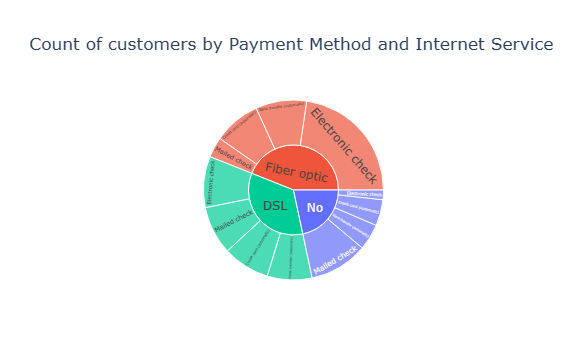

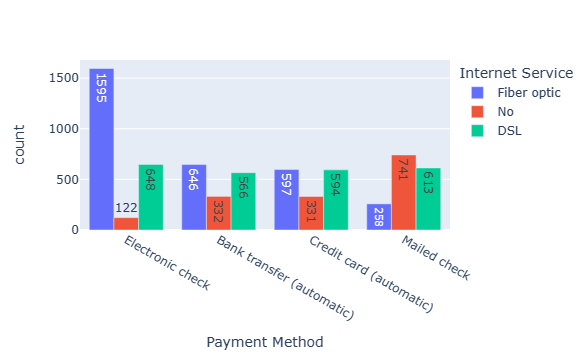

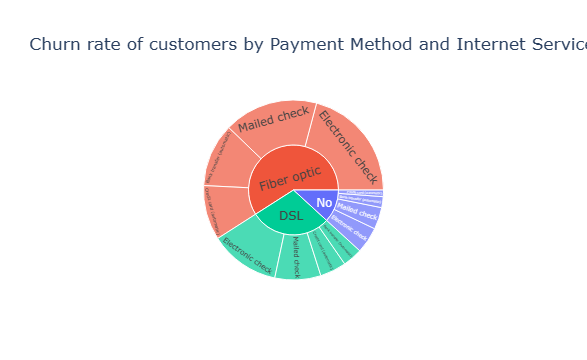

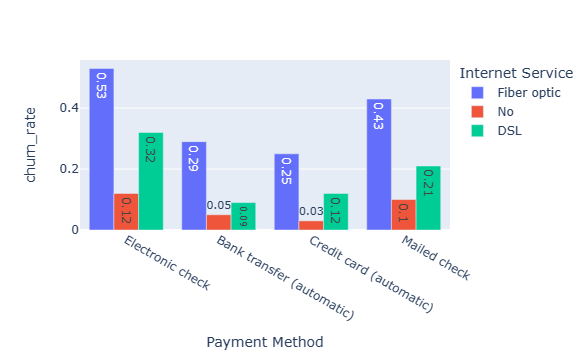

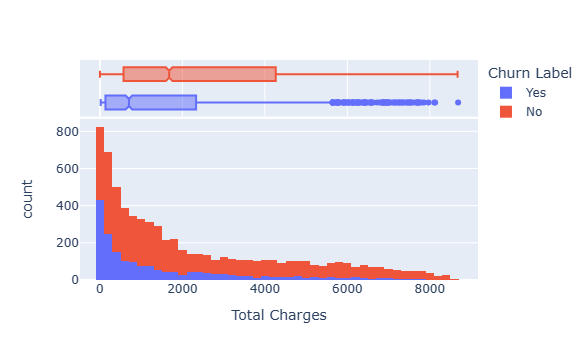

In [22]:
# Group by 'Payment Method','Internet Service' and 'Churn Label' and count the occurrences
grouped = df.groupby(['Payment Method', 'Internet Service', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby(['Payment Method', 'Internet Service']).transform('sum')
churn_rate = round(grouped / total_counts, 2)
Payment_InternetService_ChurnLabel = pd.DataFrame({'churn_rate': churn_rate}).reset_index()

# Calculate total counts per Payment Method and Internet Service
Payment_InternetService_counts = df.groupby(['Payment Method', 'Internet Service'])['CustomerID'].count().reset_index()
Payment_InternetService_counts.rename(columns={'CustomerID': 'count'}, inplace=True)

# Merge the Payment_InternetService_ChurnLabel and Payment_InternetService_counts DataFrames
Payment_InternetService_ChurnLabel = Payment_InternetService_ChurnLabel.merge(
    Payment_InternetService_counts, on=['Payment Method', 'Internet Service']
)

# Filter out the rows where 'Churn Label' is 'Yes' and sort the dataframe by count
Payment_InternetService_ChurnLabel = Payment_InternetService_ChurnLabel[
    Payment_InternetService_ChurnLabel['Churn Label'] == 'Yes'
]
Payment_InternetService_ChurnLabel = Payment_InternetService_ChurnLabel.sort_values(
    by='count', ascending=False
)
Payment_InternetService_ChurnLabel.drop(columns='Churn Label', inplace=True)

# Create a Sunburst chart based on Payment Method and Internet Service
fig_sunburst_count = px.sunburst(
    Payment_InternetService_ChurnLabel,
    path=['Internet Service', 'Payment Method'],
    values='count',
    color='Internet Service',
    title="Count of customers by Payment Method and Internet Service",
)
fig_sunburst_count.show()

# Create a grouped bar chart for count by Payment Method and Internet Service
fig_bar_count = px.bar(
    Payment_InternetService_ChurnLabel,
    x='Payment Method',
    y='count',
    color='Internet Service',
    barmode="group",
    text='count',
)
fig_bar_count.show()

# Create a Sunburst chart based on churn rate of Payment Method and Internet Service
fig_sunburst_churn_rate = px.sunburst(
    Payment_InternetService_ChurnLabel,
    path=['Internet Service', 'Payment Method'],
    values='churn_rate',
    color='Internet Service',
    title="Churn rate of customers by Payment Method and Internet Service",
)
fig_sunburst_churn_rate.show()

# Create a grouped bar chart for churn rate by Payment Method and Internet Service
fig_bar_churn_rate = px.bar(
    Payment_InternetService_ChurnLabel,
    x='Payment Method',
    y='churn_rate',
    color='Internet Service',
    barmode="group",
    text='churn_rate',
)
fig_bar_churn_rate.show()

# Create a histogram for 'Total Charges' based on 'Churn Label'
fig_histogram_total_charges = px.histogram(df, x="Total Charges", color="Churn Label", marginal="box")
fig_histogram_total_charges.show()


In [23]:
Payment_InternetService_ChurnLabel

,Payment Method,Internet Service,churn_rate,count
15,Electronic check,Fiber optic,0.53,1595
23,Mailed check,No,0.10,741
13,Electronic check,DSL,0.32,648
3,Bank transfer (automatic),Fiber optic,0.29,646
19,Mailed check,DSL,0.21,613
9,Credit card (automatic),Fiber optic,0.25,597
7,Credit card (automatic),DSL,0.12,594
1,Bank transfer (automatic),DSL,0.09,566
5,Bank transfer (automatic),No,0.05,332
11,Credit card (automatic),No,0.03,331


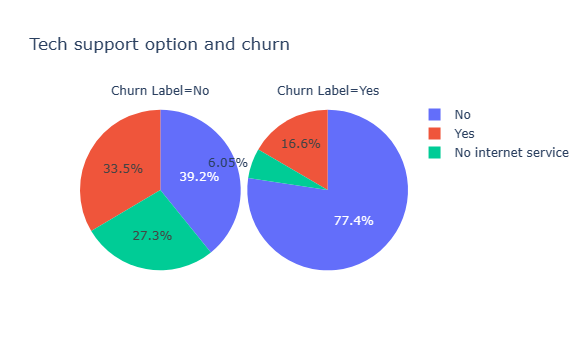

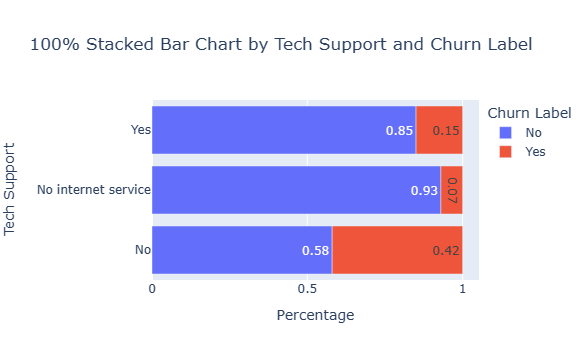

In [24]:
# Group by 'Tech Support' and 'Churn Label' and count the occurrences
grouped = df.groupby(['Tech Support', 'Churn Label'])['CustomerID'].count()

# Create a pie chart for Tech Support and Churn Label
fig_pie = px.pie(
    grouped.reset_index(),
    values='CustomerID',
    facet_col='Churn Label',
    names='Tech Support',
    title='Tech support option and churn'
)
fig_pie.show()

# Calculate normalized counts for Tech Support and Churn Label
total_counts = grouped.groupby('Tech Support').transform('sum')
normalized_count = round(grouped / total_counts, 2)
Internet_Service_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

# Create a 100% stacked bar chart for Tech Support and Churn Label
fig_bar = px.bar(
    Internet_Service_ChurnLabel,
    x='rate',
    y='Tech Support',
    color='Churn Label',
    title='100% Stacked Bar Chart by Tech Support and Churn Label',
    text='rate',
    labels={'rate': 'Percentage'}
)
fig_bar.update_layout(barmode='relative')  # Make the bar chart 100% stacked
fig_bar.show()
